In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


--2023-07-26 01:23:15--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  5.86MB/s    in 0.8s    

2023-07-26 01:23:17 (5.86 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [1]:
import numpy as np
import pandas as pd
import textwrap
import nltk
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
labels=set(df['labels'])
labels


{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [6]:
#pick a label whose data we want to train from
label = 'business'

In [7]:
texts=df[df['labels'] == label]['text']
texts.head()

0    Ad sales boost Time Warner profit\n\nQuarterly...
1    Dollar gains on Greenspan speech\n\nThe dollar...
2    Yukos unit buyer faces loan claim\n\nThe owner...
3    High fuel prices hit BA's profits\n\nBritish A...
4    Pernod takeover talk lifts Domecq\n\nShares in...
Name: text, dtype: object

In [8]:
#collect counts

probs={} #key:(w(t-1),w(t+1)), value:{w(t): count(w(t)) }
for doc in texts:
  lines=doc.split("\n")
  for line in lines:
    tokens= word_tokenize(line)
    for i in range(len(tokens)-2):
      t_0 = tokens[i]
      t_1 = tokens[i+1]
      t_2 = tokens[i+2]
      key = (t_0,t_2)
      if key not in probs:
        probs[key]={}
      #add count for middle token
      if t_1 not in probs[key]:
        probs[key][t_1] =1
      else:
        probs[key][t_1] +=1


In [9]:
#normalize probabilities
for key, d in probs.items():
  #d should represent a distribution
  total = sum(d.values())
  for k,v in d.items():
    d[k]=v/total



In [10]:
probs

{('Ad', 'boost'): {'sales': 1.0},
 ('sales', 'Time'): {'boost': 1.0},
 ('boost', 'Warner'): {'Time': 1.0},
 ('Time', 'profit'): {'Warner': 1.0},
 ('Quarterly', 'at'): {'profits': 1.0},
 ('profits', 'US'): {'at': 1.0},
 ('at', 'media'): {'US': 1.0},
 ('US', 'giant'): {'media': 0.1,
  'telecoms': 0.1,
  'banking': 0.2,
  'foods': 0.1,
  'retail': 0.1,
  'oil': 0.2,
  'mortgage': 0.1,
  'agrochemical': 0.1},
 ('media', 'TimeWarner'): {'giant': 1.0},
 ('giant', 'jumped'): {'TimeWarner': 1.0},
 ('TimeWarner', '76'): {'jumped': 1.0},
 ('jumped', '%'): {'76': 0.14285714285714285,
  '1.8': 0.14285714285714285,
  '11': 0.14285714285714285,
  '6': 0.14285714285714285,
  '10.7': 0.14285714285714285,
  '7': 0.14285714285714285,
  '22': 0.14285714285714285},
 ('76', 'to'): {'%': 1.0},
 ('%', '$'): {'to': 0.7727272727272727, 'at': 0.22727272727272727},
 ('to', '1.13bn'): {'$': 1.0},
 ('$', '('): {'1.13bn': 0.006802721088435374,
  '900m': 0.006802721088435374,
  '280bn': 0.02040816326530612,
  '86m':

In [11]:
texts.iloc[0].split('\n')

['Ad sales boost Time Warner profit',
 '',
 'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.',
 '',
 'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.',
 '',
 "Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers a

In [12]:
def spin_document(doc):
  #split the document into lines (paragraphs)
  lines=doc.split("\n")
  output = []
  for line in lines:
    if line:
      new_line= spin_line(line)
    else:
      new_line=line
    output.append(new_line)
  return "\n".join(output)

In [13]:
detokenizer = TreebankWordDetokenizer()

In [14]:
texts.iloc[0].split("\n")[2]

'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.'

In [15]:
detokenizer.detokenize(word_tokenize(texts.iloc[0].split("\n")[2]))

'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.'

In [16]:
def sample_word(d):
  p0=np.random.random()
  cumualtive=0
  for t,p in d.items():
    cumulative +=p
    if p0<cumulative:
      return t
    assert(False) #should never come here

In [17]:
def spin_line(line):
  tokens = word_tokenize(line)
  i=0
  output=[tokens[0]]
  while i<(len(tokens)-2):
    t_0 = tokens[i]
    t_1 = tokens[i+1]
    t_2 = tokens[i+2]
    keys=(t_0,t_2)
    pdist=probs[key]
    if len(pdist)>1 and np.random.random()<0.3:
      #let's replace the middle word
      middle =  sample_word(pdist)
      output.append(t_1)
      output.append("<"+middle+">")
      output.append(t_2)

  #we won't replace the thrid token since the 2nd token was dependant on it
  #instead we skip ahead 2 steps
      i+=2
    else:
      #we won't replace this middle word
      output.append(t_1)
    #append the final token  - only if  there was no replacement
  if i == len(tokens)-2:
    output.append(tokens[-1])
  return detokenizer.detokenize(output)

In [18]:
np.random.seed(1234)

In [ ]:
i = np.random.choice(texts.shape[0])
doc = texts.iloc[i]
new_doc = spin_document(doc)


In [ ]:
print(textwrap.fill(new_doc,replace_whitespace=False,fix_sentence_endings=True))  #make sure the text dows not go ofdf the screen

## The output should have looked liked this

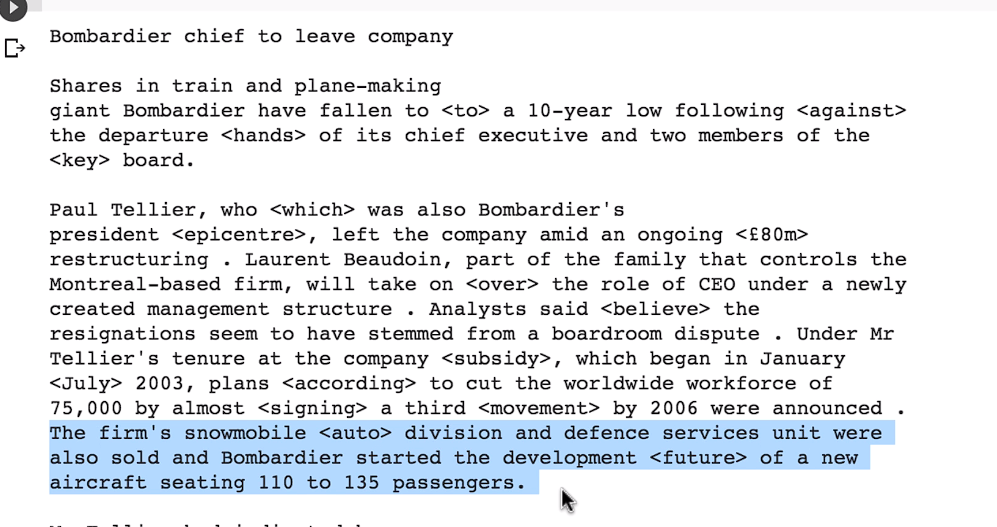